In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

N=3600#total number of seconds in one hour
N=N
readings=np.ones(int(N/60))*90
dt=1/N
noise=np.random.normal(0,7.35,N)


readings=readings+np.random.normal(0,8,len(readings))
u=np.zeros(N)
pred_u=np.ones(N)*90
pred_x=np.zeros(N)
x=np.zeros(N)

for i in range(0,N):
    u[i]=readings[int(i/len(readings))]
    


Creating noisyand desired velocity position estimates

Text(0, 0.5, 'kilometers/hour')

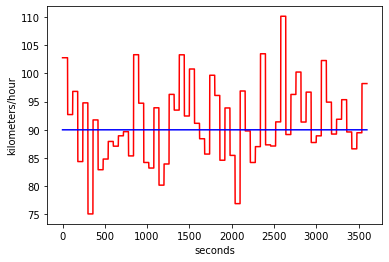

In [2]:
plt.plot(u,'r',label="Measurement Values")
plt.plot(pred_u,'b',label="Desired velocity")

plt.xlabel("seconds")
plt.ylabel("kilometers/hour")

Text(0, 0.5, 'Km/hr')

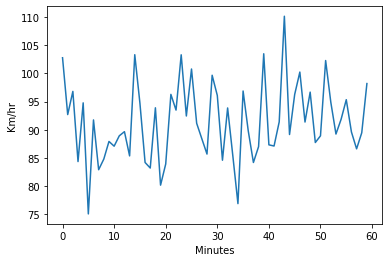

In [3]:
plt.plot(readings)
plt.xlabel("Minutes")
plt.ylabel("Km/hr")

60 data velocity data points with noisy

Text(0, 0.5, 'kilometers')

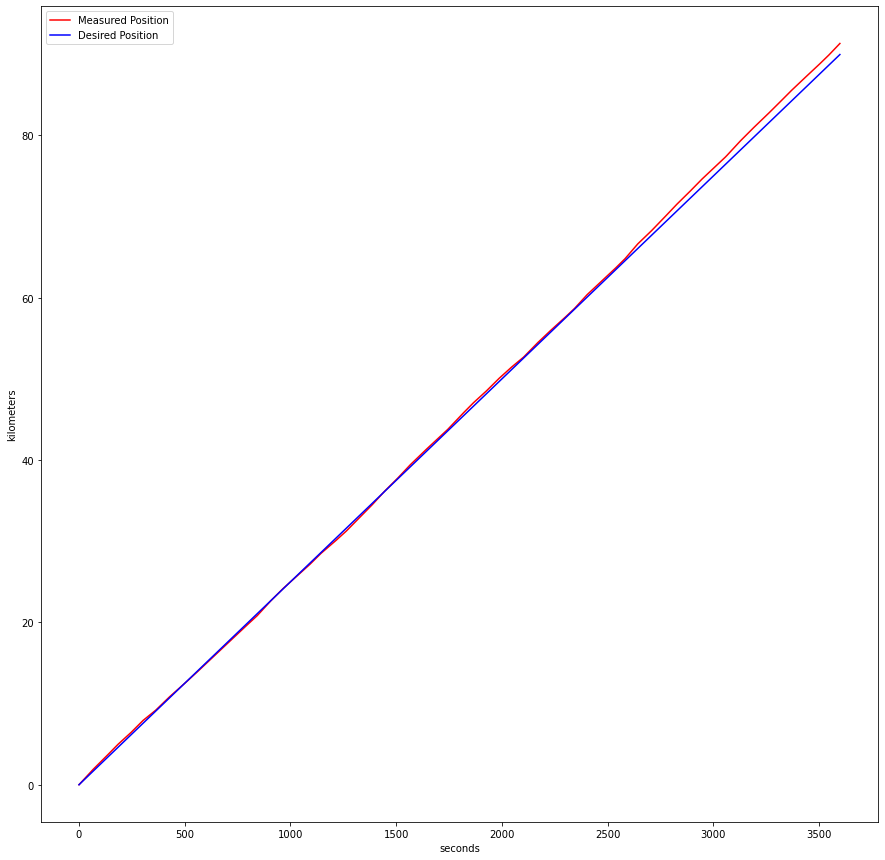

In [4]:
for i in range(1,N):
    x[i]=x[i-1]+u[i-1]*dt
    pred_x[i]=pred_x[i-1]+pred_u[i-1]*dt

plt.figure(figsize=(15,15))
plt.plot(x[:N],'r',label="Measured Position")
plt.plot(pred_x[:N],'b',label="Desired Position")
plt.legend()
plt.xlabel("seconds")
plt.ylabel("kilometers")


corresponding desired and measured estimates

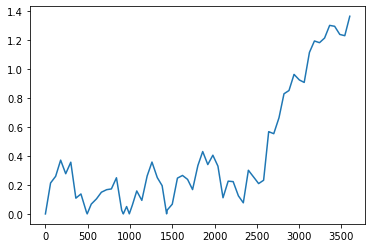

In [5]:
plt.plot(np.sqrt((pred_x-x)**2))

magnitude of error in position measurements

In [6]:
def kalm(theta_ukf,omega_ukf,observed,X_pred,dt,P=np.array([[0.01,0],[0,1]])):
    F=np.array([[1,dt],[0,1]]) #state transition matrix#
    X_prev=np.array([theta_ukf,omega_ukf])# previous output value
    G=np.array([0.5*dt**2,dt]) # control variables
    acc=(observed[1]-omega_ukf)/dt # 
    
    X_pred=X_pred #Desired value
    Qk=np.array([[0.25*dt**4,0.5*dt**3],[0.5*dt**3,dt**2]])*0.3  #covariance of process noise  
    H=np.array([1,0])#observation model
    Pk=np.matmul(np.matmul(F,P),F.T)+(Qk*acc)#predicted estimate covariance
    inv=np.matmul(np.matmul(H,Pk),H.T) +0.05
    K=np.matmul(Pk,H.T)/inv
    X_pred+=K*(observed-np.matmul(H,X_pred))#updation step
    var=1-np.matmul(K,H)
    Pk=var*Pk
    return X_pred, Pk

Function to define kalman filter

In [7]:
x_Kf=list([0])# position output values of kalman filter 
u_Kf=list([90])# velocity output values of kalman filter 

v2=np.array([[0.01,0],[0,1]])
out_x=list()
out_u=list()
for i in range(0,N):
    v1,v2=kalm(x_Kf[-1],u_Kf[-1],[x[i],u[i]],[pred_x[i],pred_u[i]],dt)#,v2)
    x_Kf.append(v1[0])
    u_Kf.append(v1[1])
    

Text(0, 0.5, 'velocity')

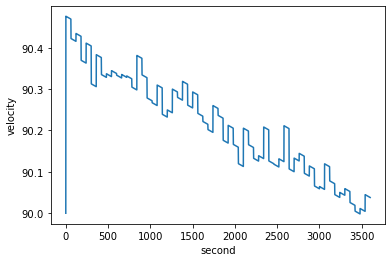

In [8]:
plt.plot(u_Kf)
plt.xlabel("second")
plt.ylabel("velocity")


Velocity output

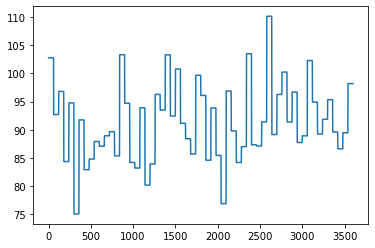

In [9]:
plt.plot(u)

Noisy velocity input

Text(0, 0.5, 'kilometers/hour')

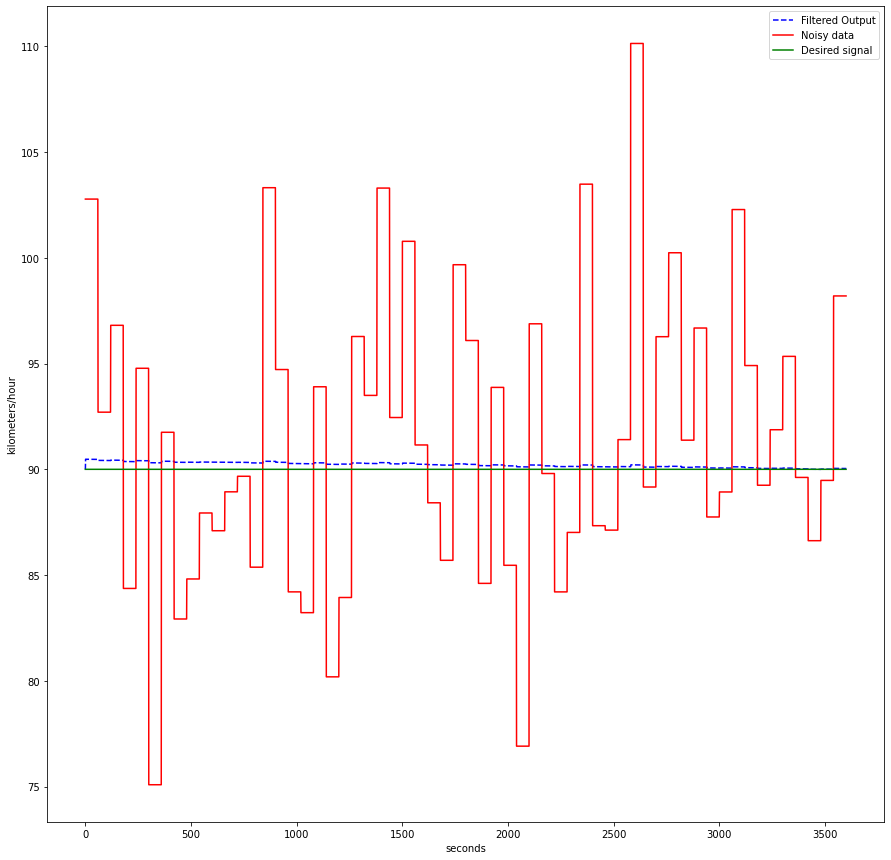

In [10]:
plt.figure(figsize=(15,15))
plt.plot(u_Kf,'--b',label="Filtered Output")
plt.plot(u,'r',label="Noisy data")
plt.plot(pred_u,'g',label="Desired signal")
plt.legend()
plt.xlabel("seconds")
plt.ylabel("kilometers/hour")

Text(0, 0.5, 'kilometers')

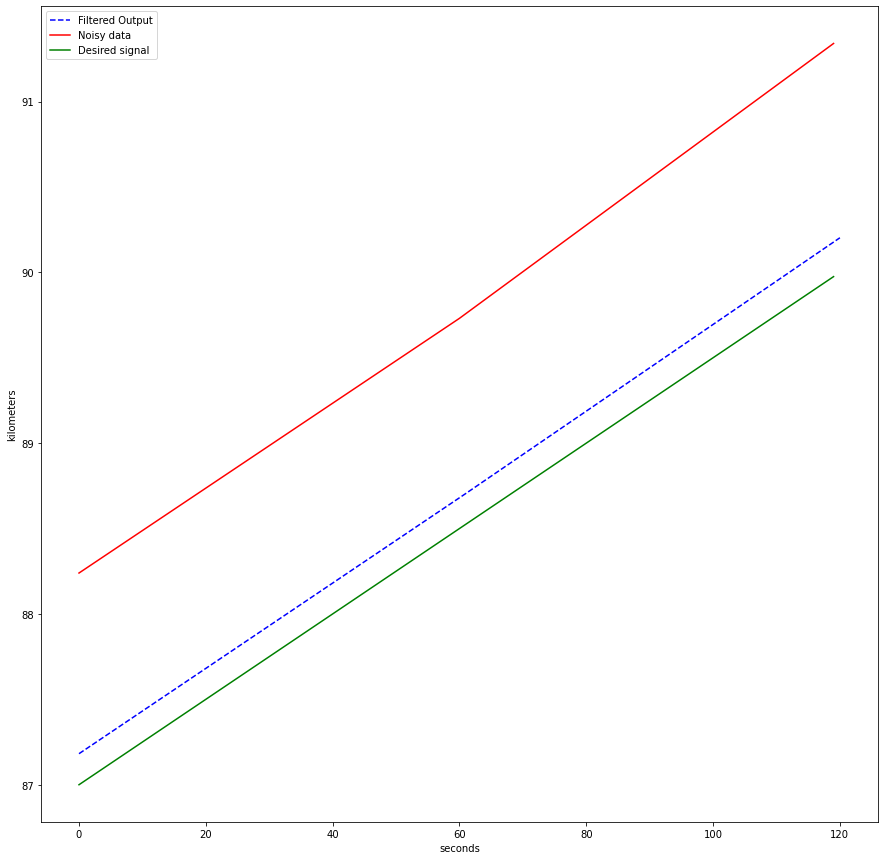

In [11]:
plt.figure(figsize=(15,15))
plt.plot(x_Kf[N-120:],'--b',label="Filtered Output")
plt.plot(x[N-120:],'r',label="Noisy data")
plt.plot(pred_x[N-120:],'g',label="Desired signal")
plt.legend()
plt.xlabel("seconds")
plt.ylabel("kilometers")

Text(0, 0.5, 'kilometers')

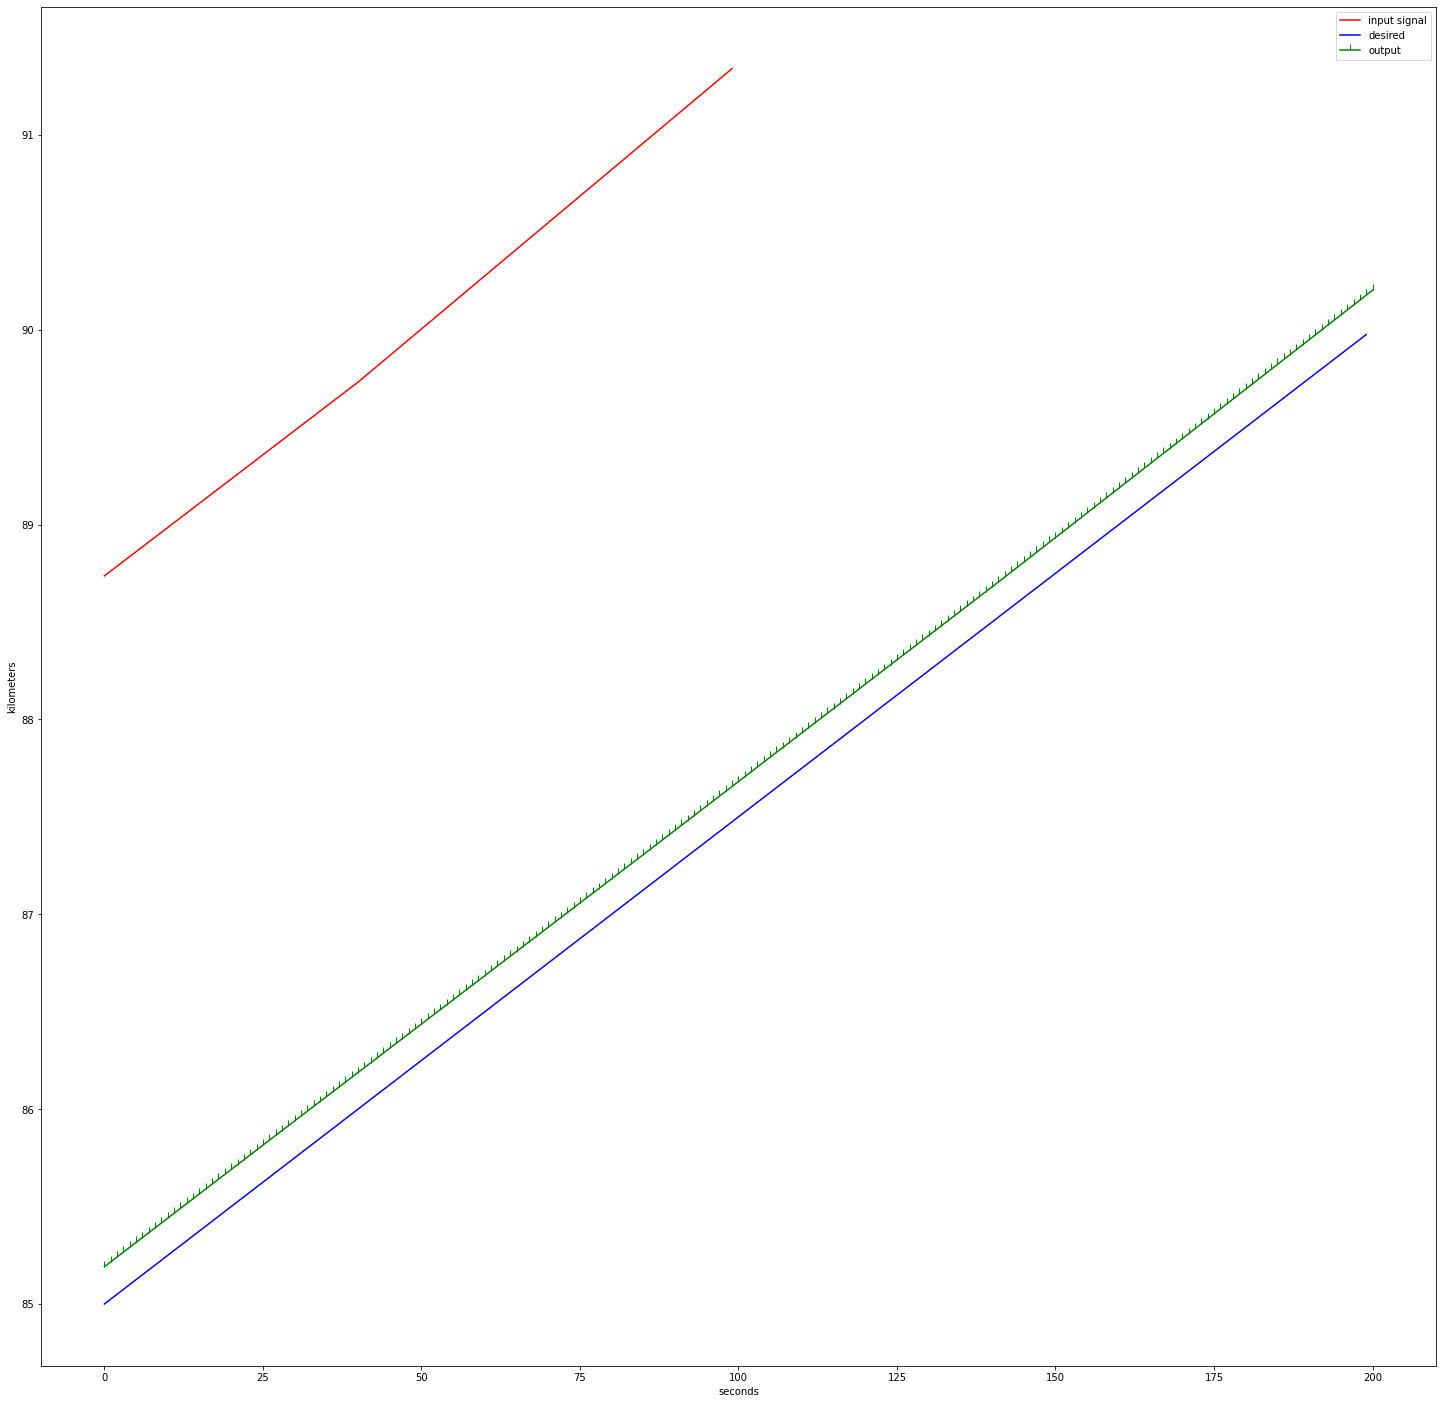

In [12]:
plt.figure(figsize=(25,25))
plt.plot(x[N-100:],'r',label='input signal')
plt.plot(pred_x[N-200:],'b',label='desired')
plt.plot(x_Kf[N-200:],'g',label='output',marker=2)

plt.xlabel("seconds")
plt.legend()
plt.ylabel("kilometers")


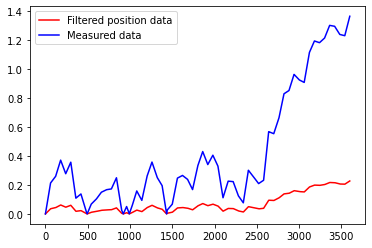

In [13]:
plt.plot(np.sqrt((x_Kf[1:]-pred_x)**2),'r',label="Filtered position data")
plt.plot(np.sqrt((x-pred_x)**2),'b',label="Measured data")
plt.legend()

Position error magnitude

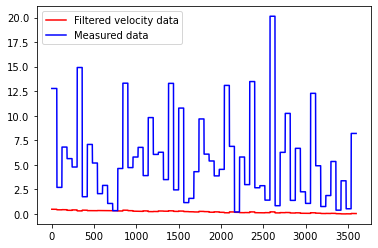

In [14]:
plt.plot(np.sqrt((u_Kf[1:]-pred_u)**2),'r',label="Filtered velocity data")
plt.plot(np.sqrt((u-pred_u)**2),'b',label="Measured data")
plt.legend()

Velocity error magnitude 

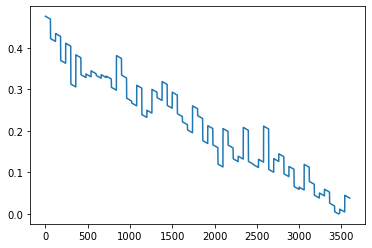

In [15]:
plt.plot(np.sqrt((u_Kf[1:]-pred_u)**2))

Q2 Creating noisy GPS data

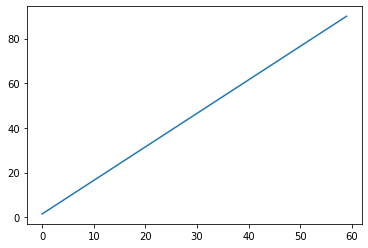

In [16]:
x_gps=np.zeros(int(N/60))
v_gps=np.zeros((int(N/60)))




for i in range(0,len(x_gps)):
    x_gps[i]=x_gps[i-1]+(90*60)*dt
    v_gps[i]=(x_gps[i]-x_gps[i-1])/(60*dt)

plt.plot(x_gps)

Desired GPS readings

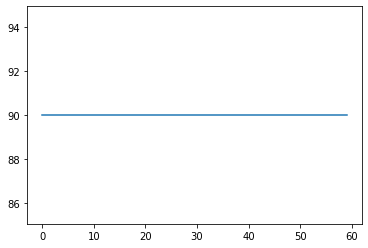

In [17]:
plt.plot(v_gps)

Desired velocity readings

In [18]:
desired_gps_x=np.linspace(x_gps[0],x_gps[-1],N)
desired_gps_u=np.linspace(v_gps[0],v_gps[-1],N)

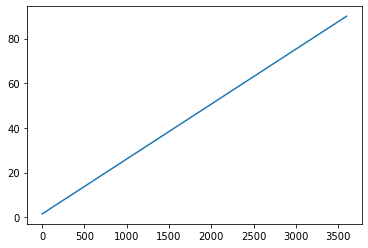

In [19]:
plt.plot(desired_gps_x)

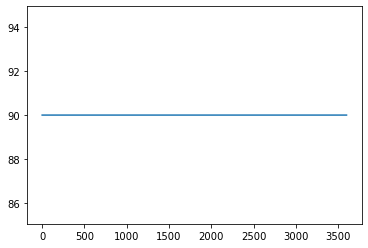

In [20]:
plt.plot(desired_gps_u)

In [21]:
x_gps_in=x_gps+np.random.normal(0,0.3,len(x_gps))

In [22]:
u_gps_in=list([90])
for i in range(1,len(x_gps_in)):
    u_gps_in.append((x_gps_in[i]-x_gps_in[i-1])/(60*dt))

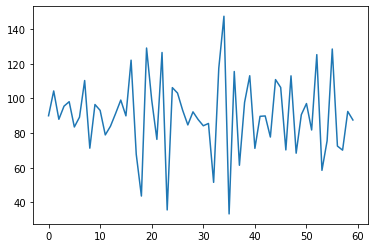

In [23]:
plt.plot(u_gps_in)

Noisy Velocity measurements from GPS data

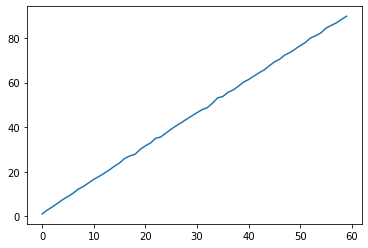

In [24]:
plt.plot(x_gps_in)

Noisy input positing data 

In [25]:
gps_x=list()
gps_u=list()
#gps_x.append(np.linspace(0,0,61)[0:60])
for i in range(0,len(x_gps_in)):
    gps_x.append((np.linspace(x_gps_in[i],x_gps_in[i],60)))
    gps_u.append((np.linspace(u_gps_in[i],u_gps_in[i],60)))
    

Propagating over 3600 seconds

In [26]:
len(gps_u)

60

In [27]:
gps_x=np.array(gps_x).flatten()
gps_u=np.array(gps_u).flatten()


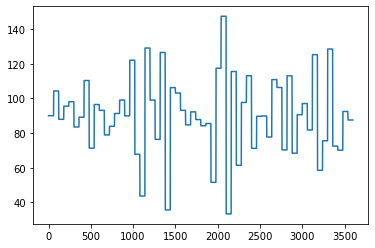

In [28]:
plt.plot(gps_u)

Text(0, 0.5, 'Kilometers')

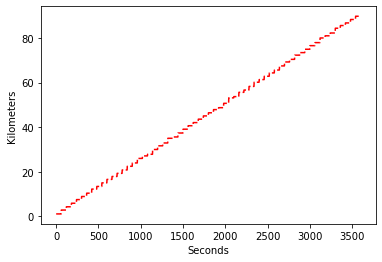

In [29]:
plt.plot(gps_x,'--r',label="Input Gps Data")
plt.xlabel("Seconds")
plt.ylabel("Kilometers")


In [30]:
x_Kf=list([0])
u_Kf=list([90])

v2=np.array([[0.01,0],[0,1]])
out_x=list()
out_u=list()
for i in range(0,N):
    v1,v2=kalm(x_Kf[-1],u_Kf[-1],[gps_x[i],gps_u[i]],[desired_gps_x[i],desired_gps_u[i]],dt)#,v2)
    x_Kf.append(v1[0])
    u_Kf.append(v1[1])

filetering algorithm

Text(0.5, 0, 'seconds')

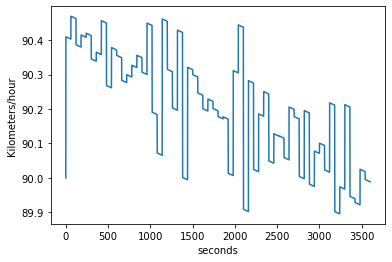

In [31]:
plt.plot(u_Kf)
plt.ylabel("Kilometers/hour")
plt.xlabel("seconds")

output velocity

Text(0.5, 0, 'seconds')

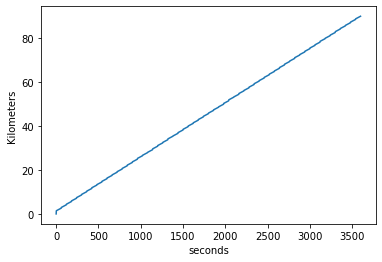

In [32]:
plt.plot(x_Kf)
plt.ylabel("Kilometers")
plt.xlabel("seconds")

output position

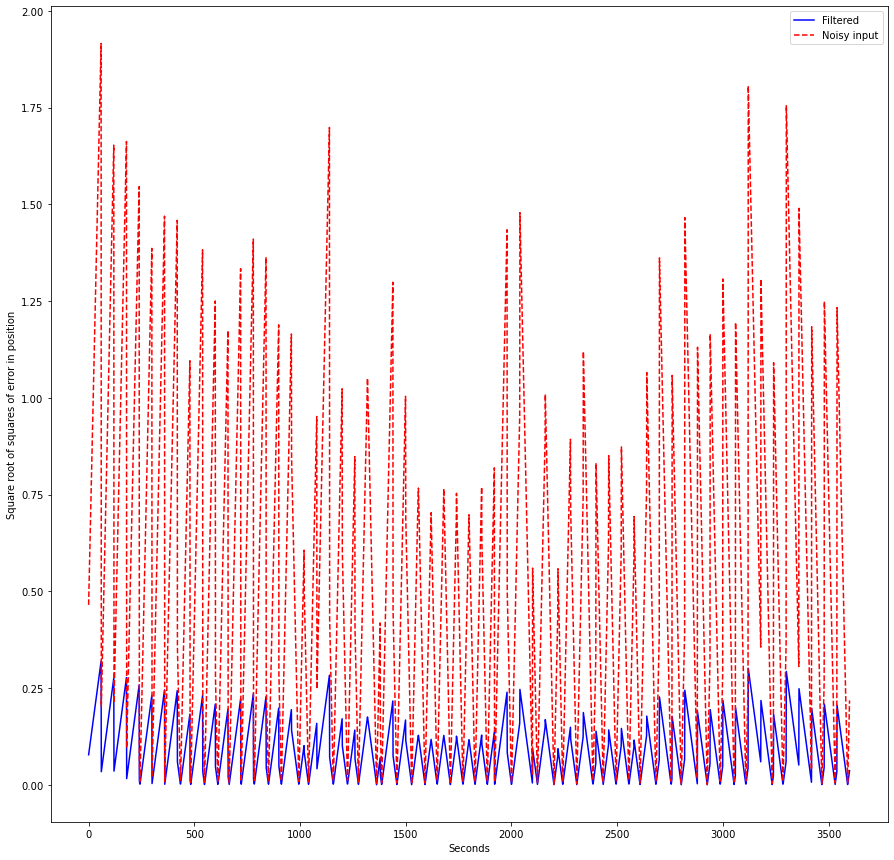

In [33]:
plt.figure(figsize=(15,15))
plt.plot(np.sqrt((desired_gps_x-x_Kf[1:])**2),'b',label='Filtered')
plt.plot(np.sqrt((desired_gps_x-gps_x)**2),'--r',label='Noisy input')
plt.xlabel("Seconds")
plt.ylabel("Square root of squares of error in position")

plt.legend()


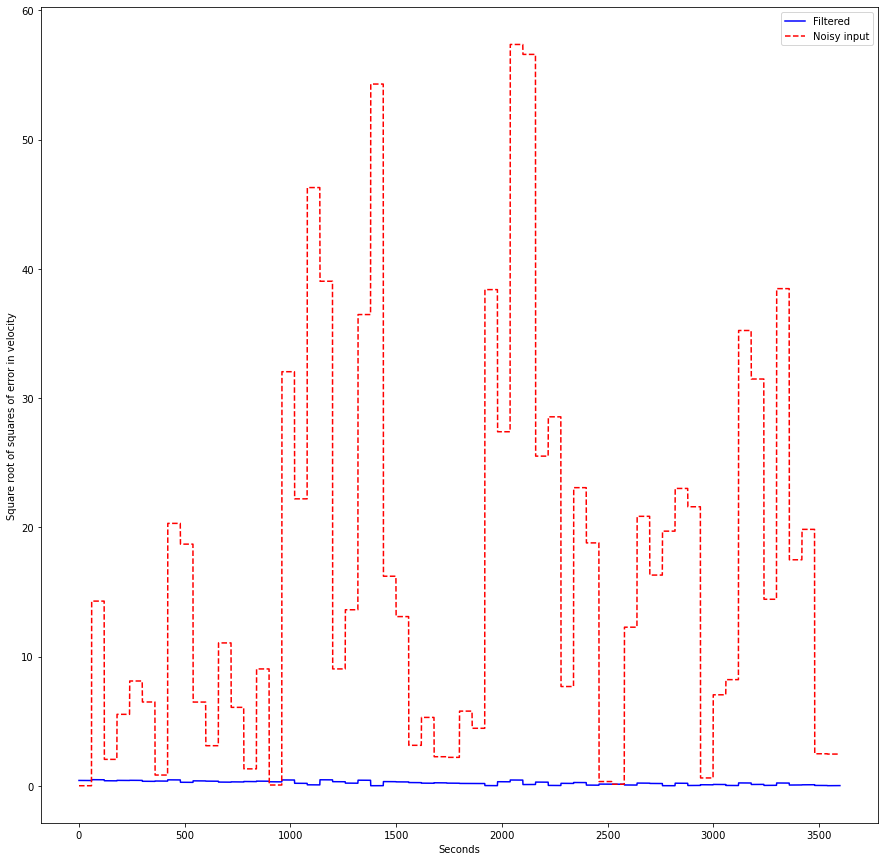

In [34]:
plt.figure(figsize=(15,15))
plt.plot(np.sqrt((desired_gps_u-u_Kf[1:])**2),'b',label='Filtered')
plt.plot(np.sqrt((desired_gps_u-gps_u)**2),'--r',label='Noisy input')
plt.xlabel("Seconds")
plt.ylabel("Square root of squares of error in velocity")
plt.legend()


Text(0, 0.5, 'kilometers')

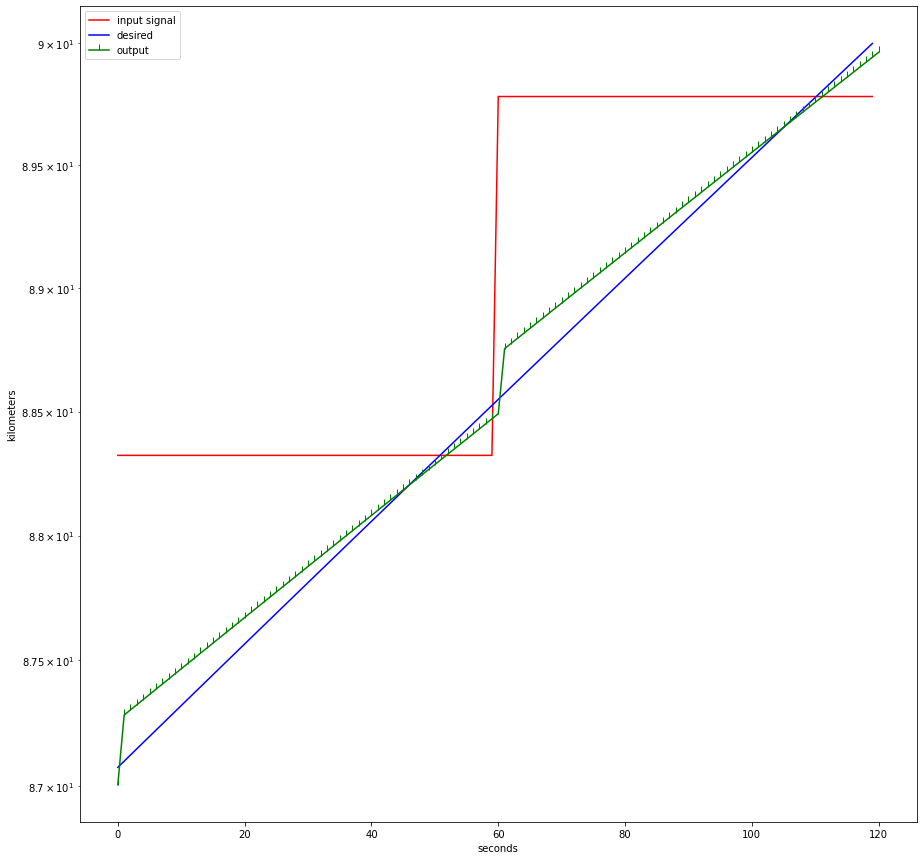

In [35]:
plt.figure(figsize=(15,15))
plt.plot(gps_x[N-120:],'r',label='input signal')
plt.plot(desired_gps_x[N-120:],'b',label='desired')
plt.plot(x_Kf[N-120:],'g',label='output',marker=2)
plt.yscale('log')
plt.xlabel("seconds")
plt.legend()
plt.ylabel("kilometers")

Output, input and desired signal for the last two minutes

Text(0, 0.5, 'kilometers')

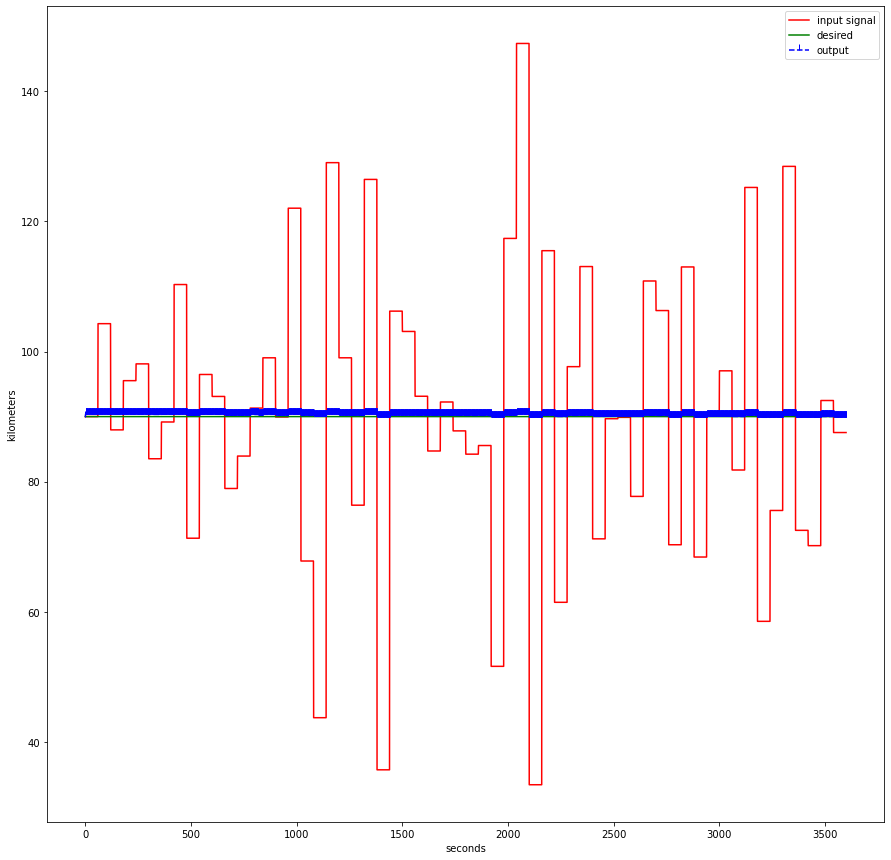

In [36]:
plt.figure(figsize=(15,15))
plt.plot(gps_u[:],'r',label='input signal')
plt.plot(desired_gps_u[:],'g',label='desired')
plt.plot(u_Kf[:],'--b',label='output',marker=2)

plt.xlabel("seconds")
plt.legend()
plt.ylabel("kilometers")

Comparing out, input and desired velocity